In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('hospital_data.csv')

In [3]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005


In [4]:
df.tail()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
29994,11/13/2019 0:00,$-,$-,$-,ANCHOR,PRIVATE,OUTPATIENT,14:01:24,14:08:56,14:15:42,DR18236B4,C39995
29995,11/13/2019 0:00,$-,$-,$-,ANCHOR,PRIVATE,OUTPATIENT,14:01:33,14:21:17,14:21:53,DR04824J4,C39996
29996,11/13/2019 0:00,$-,$-,$-,ANCHOR,PRIVATE,OUTPATIENT,14:01:41,14:13:57,14:16:29,DR15758I4,C39997
29997,11/13/2019 0:00,$-,$-,$-,LOCUM,CORPORATE,OUTPATIENT,14:01:42,14:13:21,14:13:22,DR63323B4,C39998
29998,11/13/2019 0:00,$-,$-,$-,ANCHOR,PRIVATE,OUTPATIENT,14:01:55,14:18:40,14:19:02,DR15758I4,C39999


In [5]:
df.shape

(29999, 12)

In [6]:
df.describe()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
count,29999,29999,29999,29999,29999,29999,29999,29999,29999,29999,29999,29999
unique,13,4280,200,241,3,5,1,20629,21357,21385,199,29999
top,11/11/2019 0:00,$-,$-,$-,ANCHOR,INSURANCE,OUTPATIENT,18:07:47,20:37:28,10:04:33,DR15416D4,C30448
freq,3618,11937,28566,5576,21914,9931,29999,9,6,7,679,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    29999 non-null  object
 1    Medication Revenue     29999 non-null  object
 2     Lab Cost              29999 non-null  object
 3    Consultation Revenue   29999 non-null  object
 4   Doctor Type             29999 non-null  object
 5   Financial Class         29999 non-null  object
 6   Patient Type            29999 non-null  object
 7   Entry Time              29999 non-null  object
 8   Post-Consultation Time  29999 non-null  object
 9   Completion Time         29999 non-null  object
 10  Doctor                  29999 non-null  object
 11  Patient ID              29999 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [8]:
df.dtypes

Date                      object
 Medication Revenue       object
  Lab Cost                object
 Consultation Revenue     object
Doctor Type               object
Financial Class           object
Patient Type              object
Entry Time                object
Post-Consultation Time    object
Completion Time           object
Doctor                    object
Patient ID                object
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.dtypes

Date                      datetime64[ns]
 Medication Revenue               object
  Lab Cost                        object
 Consultation Revenue             object
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                        object
Post-Consultation Time            object
Completion Time                   object
Doctor                            object
Patient ID                        object
dtype: object

In [11]:
df.columns

Index(['Date', ' Medication Revenue ', '  Lab Cost ', ' Consultation Revenue ',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [12]:
df.columns=df.columns.str.strip()

In [13]:
df.columns

Index(['Date', 'Medication Revenue', 'Lab Cost', 'Consultation Revenue',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [14]:
df['Entry Time'] = pd.to_datetime(df['Entry Time'])
df['Post-Consultation Time'] = pd.to_datetime(df['Post-Consultation Time'])
df['Completion Time'] = pd.to_datetime(df['Completion Time'])
df.dtypes

Date                      datetime64[ns]
Medication Revenue                object
Lab Cost                          object
Consultation Revenue              object
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [15]:
def clean_text(x):
    x=x.replace('$','')
    x=x.replace(',','')
    x=x.replace('-','')
    x=x.replace(' ','')
    x=pd.to_numeric(x)
    return x
df['Medication Revenue']=df['Medication Revenue'].apply(clean_text)
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,2019-11-04,1183.22,$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,2021-01-08 08:35:45,2021-01-08 09:17:54,2021-01-08 09:29:46,DR05350C4,C10001
1,2019-11-06,738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-01-08 19:19:16,2021-01-08 21:02:36,2021-01-08 21:24:07,DR09451Z4,C10002
2,2019-11-02,660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,2021-01-08 10:46:52,2021-01-08 11:56:25,2021-01-08 12:06:28,DR17400I4,C10003
3,2019-11-06,600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,2021-01-08 09:38:34,2021-01-08 10:55:50,2021-01-08 10:58:02,DR09451Z4,C10004
4,2019-11-01,591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-01-08 11:16:21,2021-01-08 12:06:49,2021-01-08 12:06:54,DR15154H4,C10005


In [16]:
df['Lab Cost']=df['Lab Cost'].apply(clean_text)
df['Consultation Revenue']=df['Consultation Revenue'].apply(clean_text)
df.dtypes

Date                      datetime64[ns]
Medication Revenue               float64
Lab Cost                         float64
Consultation Revenue             float64
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [17]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2021-01-08 08:35:45,2021-01-08 09:17:54,2021-01-08 09:29:46,DR05350C4,C10001
1,2019-11-06,738.48,NaN,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-01-08 19:19:16,2021-01-08 21:02:36,2021-01-08 21:24:07,DR09451Z4,C10002
2,2019-11-02,660.00,NaN,21.17,ANCHOR,HMO,OUTPATIENT,2021-01-08 10:46:52,2021-01-08 11:56:25,2021-01-08 12:06:28,DR17400I4,C10003
3,2019-11-06,600.00,NaN,NaN,ANCHOR,MEDICARE,OUTPATIENT,2021-01-08 09:38:34,2021-01-08 10:55:50,2021-01-08 10:58:02,DR09451Z4,C10004
4,2019-11-01,591.60,NaN,12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-01-08 11:16:21,2021-01-08 12:06:49,2021-01-08 12:06:54,DR15154H4,C10005


In [18]:
df['Total Revenue']=df['Medication Revenue']+df['Consultation Revenue']+df['Lab Cost']
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2021-01-08 08:35:45,2021-01-08 09:17:54,2021-01-08 09:29:46,DR05350C4,C10001,1213.39
1,2019-11-06,738.48,NaN,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-01-08 19:19:16,2021-01-08 21:02:36,2021-01-08 21:24:07,DR09451Z4,C10002,NaN
2,2019-11-02,660.00,NaN,21.17,ANCHOR,HMO,OUTPATIENT,2021-01-08 10:46:52,2021-01-08 11:56:25,2021-01-08 12:06:28,DR17400I4,C10003,NaN
3,2019-11-06,600.00,NaN,NaN,ANCHOR,MEDICARE,OUTPATIENT,2021-01-08 09:38:34,2021-01-08 10:55:50,2021-01-08 10:58:02,DR09451Z4,C10004,NaN
4,2019-11-01,591.60,NaN,12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-01-08 11:16:21,2021-01-08 12:06:49,2021-01-08 12:06:54,DR15154H4,C10005,NaN


In [19]:
df=df.fillna(0)
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2021-01-08 08:35:45,2021-01-08 09:17:54,2021-01-08 09:29:46,DR05350C4,C10001,1213.39
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-01-08 19:19:16,2021-01-08 21:02:36,2021-01-08 21:24:07,DR09451Z4,C10002,0.00
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2021-01-08 10:46:52,2021-01-08 11:56:25,2021-01-08 12:06:28,DR17400I4,C10003,0.00
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2021-01-08 09:38:34,2021-01-08 10:55:50,2021-01-08 10:58:02,DR09451Z4,C10004,0.00
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-01-08 11:16:21,2021-01-08 12:06:49,2021-01-08 12:06:54,DR15154H4,C10005,0.00


# What time has the most visitors?

In [20]:
df['Entry Hour']=df['Entry Time'].dt.hour
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue,Entry Hour
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2021-01-08 08:35:45,2021-01-08 09:17:54,2021-01-08 09:29:46,DR05350C4,C10001,1213.39,8
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-01-08 19:19:16,2021-01-08 21:02:36,2021-01-08 21:24:07,DR09451Z4,C10002,0.00,19
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2021-01-08 10:46:52,2021-01-08 11:56:25,2021-01-08 12:06:28,DR17400I4,C10003,0.00,10
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2021-01-08 09:38:34,2021-01-08 10:55:50,2021-01-08 10:58:02,DR09451Z4,C10004,0.00,9
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-01-08 11:16:21,2021-01-08 12:06:49,2021-01-08 12:06:54,DR15154H4,C10005,0.00,11


In [21]:
Most_Visitors = df.groupby(df['Entry Hour'])['Patient ID'].count()
Most_Visitors

Entry Hour
7       12
8     3489
9     4297
10    3680
11    3306
12    1446
13     426
14    3030
15    1847
16    1249
17     219
18    2600
19    2269
20    1358
21     500
22     238
23      33
Name: Patient ID, dtype: int64

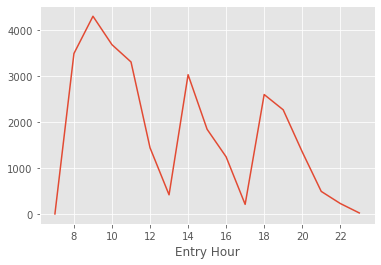

In [22]:
plt.style.use('ggplot')
Most_Visitors = df.groupby(df['Entry Hour'])['Patient ID'].count().plot()

By visualizing,we can conclude that the maximum number of patients visiting the clinic is around 9AM(i.e when the clinic opens).This implies that there are around 4300 visitor patients.This figure drops at the 5PM.

# Does the Total Revenue corelate with the Total Visitors?

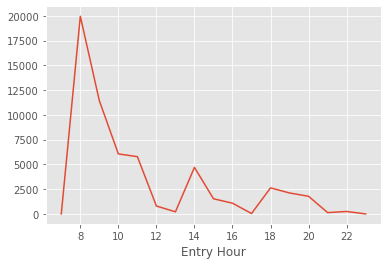

In [23]:
RV=df.groupby(df['Entry Hour'])['Total Revenue'].sum().plot()

In [24]:
case1=df.groupby(df['Entry Hour']).sum()
case2=df.groupby(df['Entry Hour']).count()
merge = case1.merge(case2, on='Entry Hour')
merge

,Medication Revenue_x,Lab Cost_x,Consultation Revenue_x,Total Revenue_x,Date,Medication Revenue_y,Lab Cost_y,Consultation Revenue_y,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue_y
Entry Hour,,,,,,,,,,,,,,,,,
7,350.66,520.00,198.63,0.00,12,12,12,12,12,12,12,12,12,12,12,12,12
8,83404.62,22475.27,51180.15,19959.28,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489
9,96195.61,14879.28,60216.56,11429.42,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297
10,75239.66,6688.98,52072.67,6060.60,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680
11,72675.83,6860.23,48192.03,5780.90,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306
12,25755.63,2614.32,21251.02,797.19,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446
13,7773.26,1125.83,7633.83,213.32,426,426,426,426,426,426,426,426,426,426,426,426,426
14,59035.21,4946.53,42690.42,4696.92,3030,3030,3030,3030,3030,3030,3030,3030,3030,3030,3030,3030,3030
15,37054.80,1959.22,26703.60,1531.58,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847


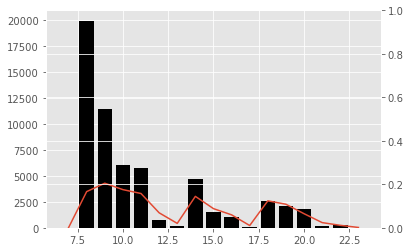

In [25]:
fig, ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(merge.index,merge['Total Revenue_x'],color='black')
ax1.plot(merge.index,merge['Patient ID'])

By this we can say that the Total Revenue get increased at the entry hour of the clinic and as well at around 2PM.The graph explains that the Total Revenue and the Total Visitors correlate well with eachother.

# What percentage of revenue comes from different Insurance Types ?

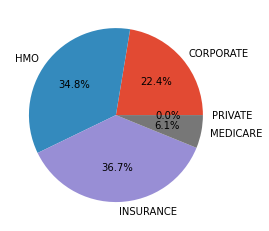

In [26]:
pivot=df.groupby('Financial Class').sum()
plt.pie(pivot['Total Revenue'],labels=pivot.index,autopct='%1.1f%%');

The figure tells us that more revenue was generated through INSURANCE which constitutes around 36.7%, whereas HMO and CORPORATE generated around 34.8% and 22.4%. The lowest revenue is from MEDICARE.